In [1]:
### import manually defined automata
%matplotlib inline
from csrl.pomdp import GridPOMDP
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

# LTL Specification
#ltl = '(GFa & GFb) & G!c' ### goes to 'a', 'b' recurrently, gallobly ! c

# Translate the LTL formula to an LDBA
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 3


Initial state: 0
Transition function: [
  {(): 0, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 1, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 2, ('a',): 2, ('b',): 2, ('c',): 2, ('a', 'b'): 2, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2}
]
Acceptance: [
  {(): [None], ('a',): [True], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [True], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]}
]


(None, None, None)

In [2]:
# POMDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       ('c',),       ('c',),       (),       (),       (),       (),       (),       ()],
[(),       (),       ('c',),       ('c',),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       ('c',),       ('c',),       (),       ()],
[(),       (),       (),       (),       (),       (),       ('c',),       ('c',),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)

grid_pomdp = GridPOMDP(shape=shape,structure=structure,label=label) 

# Construct the product POMDP
csrl = ControlSynthesis(grid_pomdp,oa)

C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_836/3991470510.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.belief_state

array([[[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]],

        [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
    

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([

In [5]:
csrl.reward

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0

In [6]:
exploration_rate, t2, accumulated_rewards = csrl.train_DQN(EPISODES=6000,num_steps=500) #8000, 500

D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 0/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 2/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 3/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 4/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 17.39991945028305
episode: 5/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 6/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 7/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.95004653930664
episode: 8/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 9/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.026213109493255615
episode: 10/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 11/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.6875
episode: 12/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.30

episode: 102/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.991597712039948
episode: 103/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.616104543209076
episode: 104/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.121724367141724
episode: 105/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0009049177169799805
episode: 106/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 107/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.976836204528809
episode: 108/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.976727724075317
episode: 109/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 110/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.015851497650146484
episode: 111/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 112/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.6875
episode: 113/6000, steps: 500, e: 1.0
accumulated_rewards_per_ep

episode: 202/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 203/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 3.1113624572753906e-05
episode: 204/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 205/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 13.705199778079987
episode: 206/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.109240233898163
episode: 207/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.28662109375
episode: 208/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 209/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.983390808105469
episode: 210/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 211/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 212/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 213/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 214/6000, steps: 

episode: 303/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 12.915678977966309
episode: 304/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 305/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.468994140625
episode: 306/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 307/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.8671875
episode: 308/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.99705684185028
episode: 309/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 310/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.458558559417725
episode: 311/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 312/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 313/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 314/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.890625
episode: 315/6000, steps: 500, e: 1

episode: 404/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.0234447717666626
episode: 405/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 406/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.4824981689453125
episode: 407/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.982498347759247
episode: 408/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 409/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 410/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 411/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0003807544708251953
episode: 412/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 413/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.001647233963013
episode: 414/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 415/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.996580481529236
episode: 

episode: 505/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 506/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 507/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.012424826622009277
episode: 508/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 509/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.6875
episode: 510/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 511/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 512/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 513/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 7.12521755695343
episode: 514/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 515/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.101323544979095
episode: 516/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.757813930511475
episode: 517/6000, steps: 500, e: 1.0


episode: 607/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.7022043466567993
episode: 608/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.351331770420074
episode: 609/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 610/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 5.257129669189453e-05
episode: 611/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 612/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 613/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.715883612632751
episode: 614/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.197149276733398
episode: 615/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 616/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 617/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.0728836059570312e-06
episode: 618/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.031784

episode: 708/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 12.386752605438232
episode: 709/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 710/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 711/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 712/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 713/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 714/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 715/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.124755859375
episode: 716/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.976978540420532
episode: 717/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 718/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 719/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.4901161193847656e-06
episode: 720/6000, steps: 500, e: 1.0
acc

episode: 810/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 811/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 7.8542962074279785
episode: 812/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 813/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 814/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 815/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 816/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.020018696784973145
episode: 817/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 818/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.992080330848694
episode: 819/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.1484375
episode: 820/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.95004653930664
episode: 821/6000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 822/6000, steps: 500, e: 1

episode: 911/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 912/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 913/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 914/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.311874389648438
episode: 915/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.00010925531387329102
episode: 916/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 917/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.259820461273193
episode: 918/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 18.31689453125
episode: 919/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.106414794921875
episode: 920/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.1484375
episode: 921/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 922/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode

episode: 1010/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1011/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1012/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1013/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1014/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.006820678710938
episode: 1015/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 7.9767844676971436
episode: 1016/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1017/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1018/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1019/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 6.794929504394531e-06
episode: 1020/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1021/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1022/6000, steps: 5

episode: 1109/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.33251953125
episode: 1110/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1111/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.009101867675781
episode: 1112/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1113/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.11904925107956
episode: 1114/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1115/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1116/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1117/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1118/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1119/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0019420385360717773
episode: 1120/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1121/6000,

episode: 1208/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1209/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1210/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1211/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1212/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1213/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1214/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.28662109375
episode: 1215/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.27685546875
episode: 1216/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1217/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.6875
episode: 1218/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1219/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.71103036403656
episode: 1220/6000, steps: 500, e: 0.99

episode: 1306/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.118408203125
episode: 1307/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1308/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1309/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1310/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.984703063964844
episode: 1311/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 3.1937427520751953
episode: 1312/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.1484375
episode: 1313/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1314/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1315/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.1484375
episode: 1316/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1317/6000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1318/6000, ste

episode: 1404/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1405/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 8.000008046627045
episode: 1406/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1407/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.03530597686767578
episode: 1408/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1409/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 9.97667384147644
episode: 1410/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1411/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 8.344650268554688e-07
episode: 1412/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 2.980232238769531e-07
episode: 1413/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 10.317154884338379
episode: 1414/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.8758277297019958
episode: 1415/6000, steps: 500, e: 0.98
accu

episode: 1502/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1503/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1504/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 10.290895462036133
episode: 1505/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 10.098739624023438
episode: 1506/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 3.924591839313507
episode: 1507/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1508/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 9.1484375
episode: 1509/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 6.984811007976532
episode: 1510/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1511/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.009976208209991455
episode: 1512/6000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 9.996975839138031
episode: 1513/6000, steps: 500, e: 0.98
accumulated_reward

episode: 1600/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 10.000461280345917
episode: 1601/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 1602/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 1603/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 1604/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 10.169563293457031
episode: 1605/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 1606/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 10.001358032226562
episode: 1607/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.00010627508163452148
episode: 1608/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 3.2186508178710938e-06
episode: 1609/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 1610/6000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 9.988877832889557
episode: 1611/6000, steps: 500, e: 0.97
accumulated_rewa

episode: 1698/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 9.843969881534576
episode: 1699/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.018177509307861328
episode: 1700/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 9.6875
episode: 1701/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 1702/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 1703/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 9.529291331768036
episode: 1704/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 1705/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 1706/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 1707/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 1708/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 9.65251737833023
episode: 1709/6000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 1710/6

episode: 1794/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1795/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1796/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1797/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1798/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 8.359512090682983
episode: 1799/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1800/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1801/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1802/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 2.767578125
episode: 1803/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 1804/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 10.06072998046875
episode: 1805/6000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 9.989149570465088
episode: 1806/6000, steps:

episode: 1891/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 9.9765625
episode: 1892/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 9.743003726005554
episode: 1893/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 1894/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.03658264875411987
episode: 1895/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 1896/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 1897/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 1898/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 1899/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.02756500244140625
episode: 1900/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 1901/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 3.814697265625e-06
episode: 1902/6000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 9.98105621337

episode: 1990/6000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 10.006530821323395
episode: 1991/6000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 5.492431640625
episode: 1992/6000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 9.976584613323212
episode: 1993/6000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0
episode: 1994/6000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0001049041748046875
episode: 1995/6000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0
episode: 1996/6000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0
episode: 1997/6000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 9.320413708686829
episode: 1998/6000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 9.9765625
episode: 1999/6000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0
episode: 2000/6000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 9.9765625
episode: 2001/6000, steps: 500, e: 0.92
accumulated_rewards_per_episo

episode: 2088/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 9.97659021615982
episode: 2089/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 9.976902306079865
episode: 2090/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2091/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 10.12220823764801
episode: 2092/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 9.968856871128082
episode: 2093/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2094/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2095/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 9.988989353179932
episode: 2096/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 10.118408203125
episode: 2097/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2098/6000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2099/6000, steps: 500, e: 0.9
accumulated_rewards_per_episode: 

episode: 2187/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 10.012460827827454
episode: 2188/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 0.008061408996582031
episode: 2189/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 9.997072279453278
episode: 2190/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 21.062594056129456
episode: 2191/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 0.0
episode: 2192/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 0.0
episode: 2193/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 7.179576873779297
episode: 2194/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 0.5322265625
episode: 2195/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 0.0
episode: 2196/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 0.00016319751739501953
episode: 2197/6000, steps: 500, e: 0.88
accumulated_rewards_per_episode: 0.0
episode: 2198/6000, steps: 500, e: 0.88
accumulate

episode: 2284/6000, steps: 500, e: 0.86
accumulated_rewards_per_episode: 9.984264373779297
episode: 2285/6000, steps: 500, e: 0.86
accumulated_rewards_per_episode: 10.28662109375
episode: 2286/6000, steps: 500, e: 0.86
accumulated_rewards_per_episode: 0.0
episode: 2287/6000, steps: 500, e: 0.86
accumulated_rewards_per_episode: 9.6875
episode: 2288/6000, steps: 500, e: 0.86
accumulated_rewards_per_episode: 9.9765625
episode: 2289/6000, steps: 500, e: 0.86
accumulated_rewards_per_episode: 10.004943132400513
episode: 2290/6000, steps: 500, e: 0.86
accumulated_rewards_per_episode: 0.0
episode: 2291/6000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 0.0
episode: 2292/6000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 9.984241545200348
episode: 2293/6000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 0.0
episode: 2294/6000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 9.976778864860535
episode: 2295/6000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 13.

episode: 2382/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 0.0
episode: 2383/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 9.945589542388916
episode: 2384/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 0.47165340185165405
episode: 2385/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 0.0
episode: 2386/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 10.134415030479431
episode: 2387/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 10.101545989513397
episode: 2388/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 0.0
episode: 2389/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 10.06396484375
episode: 2390/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 0.0
episode: 2391/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 0.02646815776824951
episode: 2392/6000, steps: 500, e: 0.82
accumulated_rewards_per_episode: 0.0
episode: 2393/6000, steps: 500, e: 0.82
accumulated_rewards_per_ep

episode: 2479/6000, steps: 500, e: 0.79
accumulated_rewards_per_episode: 0.0
episode: 2480/6000, steps: 500, e: 0.79
accumulated_rewards_per_episode: 10.118408203125
episode: 2481/6000, steps: 500, e: 0.79
accumulated_rewards_per_episode: 9.945585250854492
episode: 2482/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 5.185604095458984e-06
episode: 2483/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 0.0
episode: 2484/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 9.976592123508453
episode: 2485/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 0.0
episode: 2486/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 0.12985730171203613
episode: 2487/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 0.00010854005813598633
episode: 2488/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 9.988983392715454
episode: 2489/6000, steps: 500, e: 0.78
accumulated_rewards_per_episode: 0.0
episode: 2490/6000, steps: 500, e: 0.78
accumu

episode: 2577/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 2578/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 2579/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 2580/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 2581/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 2582/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 9.992108702659607
episode: 2583/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.013856709003448486
episode: 2584/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 9.453126311302185
episode: 2585/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 5.582782566547394
episode: 2586/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 1.2391634583473206
episode: 2587/6000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 11.454040825366974
episode: 2588/6000, steps: 500, e: 0.74
accumulated_rewards_per_

episode: 2674/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2675/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2676/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2677/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 10.127920866012573
episode: 2678/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2679/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.02357161045074463
episode: 2680/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2681/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2682/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 8.180908203125
episode: 2683/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2684/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.0
episode: 2685/6000, steps: 500, e: 0.69
accumulated_rewards_per_episode: 0.026014745235443115
episode: 2686/600

episode: 2770/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.2623980641365051
episode: 2771/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.0
episode: 2772/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.0
episode: 2773/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.14022105932235718
episode: 2774/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.0
episode: 2775/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.0
episode: 2776/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.568981409072876
episode: 2777/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 0.0
episode: 2778/6000, steps: 500, e: 0.64
accumulated_rewards_per_episode: 12.779894590377808
episode: 2779/6000, steps: 500, e: 0.63
accumulated_rewards_per_episode: 0.0
episode: 2780/6000, steps: 500, e: 0.63
accumulated_rewards_per_episode: 2.033571779727936
episode: 2781/6000, steps: 500, e: 0.63
accumulated_rewards_per_episode: 0.0
ep

episode: 2867/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 9.987613320350647
episode: 2868/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 2869/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 2870/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 9.738265991210938
episode: 2871/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 2872/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 2873/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 2874/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.007588863372802734
episode: 2875/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 9.4453125
episode: 2876/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 7.228269577026367
episode: 2877/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 2878/6000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 9.9845576882362

episode: 2963/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 10.023683190345764
episode: 2964/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 9.976950824260712
episode: 2965/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 9.1484375
episode: 2966/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 10.030019581317902
episode: 2967/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 9.65653133392334
episode: 2968/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 0.5669177770614624
episode: 2969/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 0.0
episode: 2970/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 0.0
episode: 2971/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 7.943716466426849
episode: 2972/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 10.127980768680573
episode: 2973/6000, steps: 500, e: 0.52
accumulated_rewards_per_episode: 0.0
episode: 2974/6000, steps: 500, e: 0.52
accumu

episode: 3059/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.0
episode: 3060/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.0
episode: 3061/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.0003548860549926758
episode: 3062/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.31787109375
episode: 3063/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 9.663978517055511
episode: 3064/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.0
episode: 3065/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 9.97656261920929
episode: 3066/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 6.476688742637634
episode: 3067/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.0
episode: 3068/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.0
episode: 3069/6000, steps: 500, e: 0.46
accumulated_rewards_per_episode: 0.007574141025543213
episode: 3070/6000, steps: 500, e: 0.46
accumulated_rewards_per_epi

episode: 3155/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 2.086162567138672e-06
episode: 3156/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 4.172325134277344e-07
episode: 3157/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 9.476671040058136
episode: 3158/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 0.0
episode: 3159/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 9.929902791976929
episode: 3160/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 9.953186273574829
episode: 3161/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 10.010620892047882
episode: 3162/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 0.023285746574401855
episode: 3163/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 7.703198552131653
episode: 3164/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 9.453125
episode: 3165/6000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 0.0
episode: 3166/6000, steps: 500, e: 

episode: 3250/6000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 0.0
episode: 3251/6000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 9.976836204528809
episode: 3252/6000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 0.27685546875
episode: 3253/6000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 1.4901161193847656e-06
episode: 3254/6000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 20.18142718076706
episode: 3255/6000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 0.0
episode: 3256/6000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 9.925299644470215
episode: 3257/6000, steps: 500, e: 0.34
accumulated_rewards_per_episode: 9.6328125
episode: 3258/6000, steps: 500, e: 0.34
accumulated_rewards_per_episode: 9.97656387090683
episode: 3259/6000, steps: 500, e: 0.34
accumulated_rewards_per_episode: 9.8359375
episode: 3260/6000, steps: 500, e: 0.34
accumulated_rewards_per_episode: 1.8680357336997986
episode: 3261/6000, steps: 500, e: 0.34
ac

episode: 3345/6000, steps: 500, e: 0.3
accumulated_rewards_per_episode: 0.5396919846534729
episode: 3346/6000, steps: 500, e: 0.3
accumulated_rewards_per_episode: 0.026673316955566406
episode: 3347/6000, steps: 500, e: 0.3
accumulated_rewards_per_episode: 0.0012527108192443848
episode: 3348/6000, steps: 500, e: 0.3
accumulated_rewards_per_episode: 9.934240698814392
episode: 3349/6000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 0.005174756050109863
episode: 3350/6000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 9.1484375
episode: 3351/6000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 10.25341796875
episode: 3352/6000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 8.294825434684753
episode: 3353/6000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 0.0
episode: 3354/6000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 0.0
episode: 3355/6000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 0.0007914304733276367
episode: 3356/6000, steps: 

episode: 3440/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 0.0
episode: 3441/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 0.5263698697090149
episode: 3442/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 9.956872403621674
episode: 3443/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 0.0
episode: 3444/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 9.973121702671051
episode: 3445/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 9.976570904254913
episode: 3446/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 9.710952520370483
episode: 3447/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 0.0
episode: 3448/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 0.0
episode: 3449/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 0.0
episode: 3450/6000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 22.4531689286232
episode: 3451/6000, steps: 500, e: 0.24
accumulated_rewards_per_episo

episode: 3535/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 9.976569294929504
episode: 3536/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 0.020255565643310547
episode: 3537/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 0.0
episode: 3538/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 9.97656637430191
episode: 3539/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 0.0
episode: 3540/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 9.97658920288086
episode: 3541/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 9.988983452320099
episode: 3542/6000, steps: 500, e: 0.21
accumulated_rewards_per_episode: 0.0
episode: 3543/6000, steps: 500, e: 0.2
accumulated_rewards_per_episode: 0.0
episode: 3544/6000, steps: 500, e: 0.2
accumulated_rewards_per_episode: 0.0
episode: 3545/6000, steps: 500, e: 0.2
accumulated_rewards_per_episode: 0.0
episode: 3546/6000, steps: 500, e: 0.2
accumulated_rewards_per_episode: 9.97656255960

episode: 3630/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 10.324539184570312
episode: 3631/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 0.04741322994232178
episode: 3632/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 9.551474571228027
episode: 3633/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 0.0
episode: 3634/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 9.6875
episode: 3635/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 9.515625
episode: 3636/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 0.0
episode: 3637/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 10.052030086517334
episode: 3638/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 9.330537796020508
episode: 3639/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 9.976568639278412
episode: 3640/6000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 0.000797271728515625
episode: 3641/6000, steps: 500, e: 0.17


episode: 3724/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 9.1640625
episode: 3725/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 10.427970886230469
episode: 3726/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 10.268836975097656
episode: 3727/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 9.9609375
episode: 3728/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 0.0
episode: 3729/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 9.91406923532486
episode: 3730/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 9.976698517799377
episode: 3731/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 0.0
episode: 3732/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 0.14221757650375366
episode: 3733/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 0.0
episode: 3734/6000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 0.0
episode: 3735/6000, steps: 500, e: 0.14
accumulated_rewards_per_epis

episode: 3818/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 17.85608071088791
episode: 3819/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 8.036991536617279
episode: 3820/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 17.97665899991989
episode: 3821/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 9.968750238418579
episode: 3822/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 9.476562559604645
episode: 3823/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 10.271494150161743
episode: 3824/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 11.954689621925354
episode: 3825/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 9.488256454467773
episode: 3826/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 4.891767382621765
episode: 3827/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 10.023328006267548
episode: 3828/6000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 9.976698517799

episode: 3910/6000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 9.976568520069122
episode: 3911/6000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 12.835788011550903
episode: 3912/6000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 18.50065290927887
episode: 3913/6000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 7.478005647659302
episode: 3914/6000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 20.169339418411255
episode: 3915/6000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 0.0
episode: 3916/6000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 0.1828455924987793
episode: 3917/6000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 10.053549468517303
episode: 3918/6000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 19.95775032043457
episode: 3919/6000, steps: 500, e: 0.091
accumulated_rewards_per_episode: 9.97656387090683
episode: 3920/6000, steps: 500, e: 0.091
accumulated_rewards_per_episode: 10.10131984949112

episode: 4001/6000, steps: 500, e: 0.076
accumulated_rewards_per_episode: 9.97660481929779
episode: 4002/6000, steps: 500, e: 0.076
accumulated_rewards_per_episode: 0.8797281384468079
episode: 4003/6000, steps: 500, e: 0.075
accumulated_rewards_per_episode: 0.12488937377929688
episode: 4004/6000, steps: 500, e: 0.075
accumulated_rewards_per_episode: 9.97659021615982
episode: 4005/6000, steps: 500, e: 0.075
accumulated_rewards_per_episode: 9.936489403247833
episode: 4006/6000, steps: 500, e: 0.075
accumulated_rewards_per_episode: 10.1119384765625
episode: 4007/6000, steps: 500, e: 0.075
accumulated_rewards_per_episode: 9.1484375
episode: 4008/6000, steps: 500, e: 0.074
accumulated_rewards_per_episode: 20.09716886281967
episode: 4009/6000, steps: 500, e: 0.074
accumulated_rewards_per_episode: 9.890822172164917
episode: 4010/6000, steps: 500, e: 0.074
accumulated_rewards_per_episode: 12.609373807907104
episode: 4011/6000, steps: 500, e: 0.074
accumulated_rewards_per_episode: 0.0
episode: 

episode: 4092/6000, steps: 500, e: 0.061
accumulated_rewards_per_episode: 7.260246276855469
episode: 4093/6000, steps: 500, e: 0.061
accumulated_rewards_per_episode: 0.0
episode: 4094/6000, steps: 500, e: 0.061
accumulated_rewards_per_episode: 19.953068494796753
episode: 4095/6000, steps: 500, e: 0.061
accumulated_rewards_per_episode: 8.242795526981354
episode: 4096/6000, steps: 500, e: 0.061
accumulated_rewards_per_episode: 0.0
episode: 4097/6000, steps: 500, e: 0.061
accumulated_rewards_per_episode: 10.006068110466003
episode: 4098/6000, steps: 500, e: 0.06
accumulated_rewards_per_episode: 10.853823244571686
episode: 4099/6000, steps: 500, e: 0.06
accumulated_rewards_per_episode: 19.965783178806305
episode: 4100/6000, steps: 500, e: 0.06
accumulated_rewards_per_episode: 19.169379711151123
episode: 4101/6000, steps: 500, e: 0.06
accumulated_rewards_per_episode: 9.976564049720764
episode: 4102/6000, steps: 500, e: 0.06
accumulated_rewards_per_episode: 36.4793746471405
episode: 4103/600

episode: 4184/6000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 0.005448043346405029
episode: 4185/6000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 12.4453125
episode: 4186/6000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 8.344650268554688e-07
episode: 4187/6000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 37.011291801929474
episode: 4188/6000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 21.917128205299377
episode: 4189/6000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 0.0
episode: 4190/6000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 9.976685881614685
episode: 4191/6000, steps: 500, e: 0.048
accumulated_rewards_per_episode: 2.7840763330459595
episode: 4192/6000, steps: 500, e: 0.048
accumulated_rewards_per_episode: 39.89065420627594
episode: 4193/6000, steps: 500, e: 0.048
accumulated_rewards_per_episode: 10.0462646484375
episode: 4194/6000, steps: 500, e: 0.048
accumulated_rewards_per_episode: 17.708045959472656

episode: 4275/6000, steps: 500, e: 0.04
accumulated_rewards_per_episode: 19.93750137090683
episode: 4276/6000, steps: 500, e: 0.04
accumulated_rewards_per_episode: 59.8741814494133
episode: 4277/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 115.13329195976257
episode: 4278/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 44.04763066768646
episode: 4279/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 0.0
episode: 4280/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 28.638013780117035
episode: 4281/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 19.44598388671875
episode: 4282/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 49.75807428359985
episode: 4283/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 39.34809786081314
episode: 4284/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 0.0013783574104309082
episode: 4285/6000, steps: 500, e: 0.039
accumulated_rewards_per_episode: 0.124755859375
ep

episode: 4366/6000, steps: 500, e: 0.032
accumulated_rewards_per_episode: 29.92982107400894
episode: 4367/6000, steps: 500, e: 0.032
accumulated_rewards_per_episode: 50.27606052160263
episode: 4368/6000, steps: 500, e: 0.032
accumulated_rewards_per_episode: 79.252357006073
episode: 4369/6000, steps: 500, e: 0.032
accumulated_rewards_per_episode: 18.93519353866577
episode: 4370/6000, steps: 500, e: 0.032
accumulated_rewards_per_episode: 0.06409937143325806
episode: 4371/6000, steps: 500, e: 0.031
accumulated_rewards_per_episode: 86.64695394039154
episode: 4372/6000, steps: 500, e: 0.031
accumulated_rewards_per_episode: 19.953125059604645
episode: 4373/6000, steps: 500, e: 0.031
accumulated_rewards_per_episode: 9.976669430732727
episode: 4374/6000, steps: 500, e: 0.031
accumulated_rewards_per_episode: 0.0
episode: 4375/6000, steps: 500, e: 0.031
accumulated_rewards_per_episode: 19.95501136779785
episode: 4376/6000, steps: 500, e: 0.031
accumulated_rewards_per_episode: 79.12499630451202
e

episode: 4457/6000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 144.35937130451202
episode: 4458/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 30.395699083805084
episode: 4459/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 19.959945678710938
episode: 4460/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 31.606661081314087
episode: 4461/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 49.067115008831024
episode: 4462/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 52.76130646467209
episode: 4463/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 0.0
episode: 4464/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 44.12913954257965
episode: 4465/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 69.35557740926743
episode: 4466/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 142.45561349391937
episode: 4467/6000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 9.718855619430

episode: 4547/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 79.98701530694962
episode: 4548/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 198.043498814106
episode: 4549/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 9.629572987556458
episode: 4550/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 37.96759033203125
episode: 4551/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 225.5196373462677
episode: 4552/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 186.37114948034286
episode: 4553/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 29.484375
episode: 4554/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 122.71621531248093
episode: 4555/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 197.34039384126663
episode: 4556/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 186.6758627295494
episode: 4557/6000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 167.7268254160881
episo

episode: 4638/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 130.42902147769928
episode: 4639/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 64.33141905069351
episode: 4640/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 178.49806141853333
episode: 4641/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 126.54958474636078
episode: 4642/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 231.43139958381653
episode: 4643/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 198.22337573766708
episode: 4644/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 167.65637385845184
episode: 4645/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 85.12121164798737
episode: 4646/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 206.08904886245728
episode: 4647/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 161.13843649625778
episode: 4648/6000, steps: 500, e: 0.016
accumulated_rewards_per_episode

episode: 4728/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 192.9248633980751
episode: 4729/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 10.0611572265625
episode: 4730/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 9.89843899011612
episode: 4731/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 9.960939943790436
episode: 4732/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 15.93505859375
episode: 4733/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 29.56296396255493
episode: 4734/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 99.76609116792679
episode: 4735/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 214.1923744082451
episode: 4736/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 84.57328408956528
episode: 4737/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 27.995016276836395
episode: 4738/6000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 47.7870883

episode: 4819/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 68.34172773361206
episode: 4820/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 19.911208629608154
episode: 4821/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 41.88233643770218
episode: 4822/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 72.66610080003738
episode: 4823/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 19.96058702468872
episode: 4824/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 21.81298828125
episode: 4825/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 23.876953184604645
episode: 4826/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 111.65951615571976
episode: 4827/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 69.16556775569916
episode: 4828/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 9.976565062999725
episode: 4829/6000, steps: 500, e: 0.01
accumulated_rewards_per_episode: 9.828125894069672

episode: 4910/6000, steps: 500, e: 0.0084
accumulated_rewards_per_episode: 150.4123512506485
episode: 4911/6000, steps: 500, e: 0.0083
accumulated_rewards_per_episode: 106.40972685813904
episode: 4912/6000, steps: 500, e: 0.0083
accumulated_rewards_per_episode: 190.82510137557983
episode: 4913/6000, steps: 500, e: 0.0083
accumulated_rewards_per_episode: 100.0976911187172
episode: 4914/6000, steps: 500, e: 0.0083
accumulated_rewards_per_episode: 42.715123295784
episode: 4915/6000, steps: 500, e: 0.0083
accumulated_rewards_per_episode: 193.43773621320724
episode: 4916/6000, steps: 500, e: 0.0082
accumulated_rewards_per_episode: 196.39900988340378
episode: 4917/6000, steps: 500, e: 0.0082
accumulated_rewards_per_episode: 227.57047832012177
episode: 4918/6000, steps: 500, e: 0.0082
accumulated_rewards_per_episode: 39.70340555906296
episode: 4919/6000, steps: 500, e: 0.0082
accumulated_rewards_per_episode: 51.28886163234711
episode: 4920/6000, steps: 500, e: 0.0082
accumulated_rewards_per_e

episode: 5000/6000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 212.02867150306702
episode: 5001/6000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 39.9121749997139
episode: 5002/6000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 9.796875
episode: 5003/6000, steps: 500, e: 0.0066
accumulated_rewards_per_episode: 3.2857437133789062
episode: 5004/6000, steps: 500, e: 0.0066
accumulated_rewards_per_episode: 91.06275337934494
episode: 5005/6000, steps: 500, e: 0.0066
accumulated_rewards_per_episode: 59.8650598526001
episode: 5006/6000, steps: 500, e: 0.0066
accumulated_rewards_per_episode: 109.83761250972748
episode: 5007/6000, steps: 500, e: 0.0066
accumulated_rewards_per_episode: 160.8505533337593
episode: 5008/6000, steps: 500, e: 0.0066
accumulated_rewards_per_episode: 101.78203761577606
episode: 5009/6000, steps: 500, e: 0.0065
accumulated_rewards_per_episode: 0.0
episode: 5010/6000, steps: 500, e: 0.0065
accumulated_rewards_per_episode: 111.642581164836

episode: 5090/6000, steps: 500, e: 0.0054
accumulated_rewards_per_episode: 164.6253036260605
episode: 5091/6000, steps: 500, e: 0.0053
accumulated_rewards_per_episode: 59.72063225507736
episode: 5092/6000, steps: 500, e: 0.0053
accumulated_rewards_per_episode: 193.72802364826202
episode: 5093/6000, steps: 500, e: 0.0053
accumulated_rewards_per_episode: 139.75107765197754
episode: 5094/6000, steps: 500, e: 0.0053
accumulated_rewards_per_episode: 122.65814453363419
episode: 5095/6000, steps: 500, e: 0.0053
accumulated_rewards_per_episode: 140.20996075868607
episode: 5096/6000, steps: 500, e: 0.0053
accumulated_rewards_per_episode: 1352.8475435972214
episode: 5097/6000, steps: 500, e: 0.0053
accumulated_rewards_per_episode: 175.5992732644081
episode: 5098/6000, steps: 500, e: 0.0052
accumulated_rewards_per_episode: 38.80210065841675
episode: 5099/6000, steps: 500, e: 0.0052
accumulated_rewards_per_episode: 59.71114355325699
episode: 5100/6000, steps: 500, e: 0.0052
accumulated_rewards_per

episode: 5179/6000, steps: 500, e: 0.0043
accumulated_rewards_per_episode: 113.69239640235901
episode: 5180/6000, steps: 500, e: 0.0043
accumulated_rewards_per_episode: 0.0
episode: 5181/6000, steps: 500, e: 0.0043
accumulated_rewards_per_episode: 85.07422703504562
episode: 5182/6000, steps: 500, e: 0.0043
accumulated_rewards_per_episode: 233.9250789284706
episode: 5183/6000, steps: 500, e: 0.0042
accumulated_rewards_per_episode: 29.921998381614685
episode: 5184/6000, steps: 500, e: 0.0042
accumulated_rewards_per_episode: 245.94070410728455
episode: 5185/6000, steps: 500, e: 0.0042
accumulated_rewards_per_episode: 29.929689943790436
episode: 5186/6000, steps: 500, e: 0.0042
accumulated_rewards_per_episode: 29.9487823843956
episode: 5187/6000, steps: 500, e: 0.0042
accumulated_rewards_per_episode: 159.42740046977997
episode: 5188/6000, steps: 500, e: 0.0042
accumulated_rewards_per_episode: 62.642581820487976
episode: 5189/6000, steps: 500, e: 0.0042
accumulated_rewards_per_episode: 238.

episode: 5270/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 72.10717910528183
episode: 5271/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 161.95814859867096
episode: 5272/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 169.71325016021729
episode: 5273/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 185.23395031690598
episode: 5274/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 43.20223045349121
episode: 5275/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 88.25104051828384
episode: 5276/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 115.13173121213913
episode: 5277/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 0.0
episode: 5278/6000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 95.46490556001663
episode: 5279/6000, steps: 500, e: 0.0033
accumulated_rewards_per_episode: 119.81349813938141
episode: 5280/6000, steps: 500, e: 0.0033
accumulated_rewards_per_episode: 145.

episode: 5360/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 32.89219778776169
episode: 5361/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 98.30710077285767
episode: 5362/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 9.51373291015625
episode: 5363/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 169.58072263002396
episode: 5364/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 9.982486724853516
episode: 5365/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 69.87811094522476
episode: 5366/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 128.32614904642105
episode: 5367/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 138.8566619157791
episode: 5368/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 237.80923295021057
episode: 5369/6000, steps: 500, e: 0.0027
accumulated_rewards_per_episode: 52.29534959793091
episode: 5370/6000, steps: 500, e: 0.0027
accumulated_rewards_per_ep

episode: 5449/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 287.3978579044342
episode: 5450/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 199.08811390399933
episode: 5451/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 8.20351529121399
episode: 5452/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 169.71326166391373
episode: 5453/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 49.06387674808502
episode: 5454/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 198.9331077337265
episode: 5455/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 151.7815866470337
episode: 5456/6000, steps: 500, e: 0.0022
accumulated_rewards_per_episode: 167.8944207429886
episode: 5457/6000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 12.09576416015625
episode: 5458/6000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 9.994001626968384
episode: 5459/6000, steps: 500, e: 0.0021
accumulated_rewards_per_epi

episode: 5539/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 29.937980711460114
episode: 5540/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 0.0
episode: 5541/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 9.476562559604645
episode: 5542/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 82.62036633491516
episode: 5543/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 7.519535779953003
episode: 5544/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 9.9765625
episode: 5545/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 254.4067348241806
episode: 5546/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 52.53462791442871
episode: 5547/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 19.955080032348633
episode: 5548/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 217.42738890647888
episode: 5549/6000, steps: 500, e: 0.0017
accumulated_rewards_per_episode: 3.209164202213

episode: 5629/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 21.597720682621002
episode: 5630/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 239.12433236837387
episode: 5631/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 226.4784705042839
episode: 5632/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 164.81836861371994
episode: 5633/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 38.34243965148926
episode: 5634/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 222.26197391748428
episode: 5635/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 161.45596235990524
episode: 5636/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 132.01382142305374
episode: 5637/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 176.33454006910324
episode: 5638/6000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 177.9608689546585
episode: 5639/6000, steps: 500, e: 0.0014
accumulated_rewards_p

episode: 5719/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 191.72335481643677
episode: 5720/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 117.16716009378433
episode: 5721/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 103.39295196533203
episode: 5722/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 7.5373793840408325
episode: 5723/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 129.7579157948494
episode: 5724/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 36.32673180103302
episode: 5725/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 30.80059015750885
episode: 5726/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 245.4593689441681
episode: 5727/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 9.280023038387299
episode: 5728/6000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 277.8591536283493
episode: 5729/6000, steps: 500, e: 0.0011
accumulated_rewards_per_

episode: 5809/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 96.13703429698944
episode: 5810/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 219.91658478975296
episode: 5811/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
episode: 5812/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 146.57780414819717
episode: 5813/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 149.7491431236267
episode: 5814/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 230.21915197372437
episode: 5815/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
episode: 5816/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
episode: 5817/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 51.498926281929016
episode: 5818/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 74.02640265226364
episode: 5819/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 134.49167281389236
episode: 5820/6000, steps

episode: 5899/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 92.58200120925903
episode: 5900/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 39.912174224853516
episode: 5901/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 27.583959221839905
episode: 5902/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 78.16410803794861
episode: 5903/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 135.42586773633957
episode: 5904/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 112.51075345277786
episode: 5905/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.8525949120521545
episode: 5906/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 163.92417532205582
episode: 5907/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 178.73866987228394
episode: 5908/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
episode: 5909/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 19.9384441375

episode: 5989/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 39.132373094558716
episode: 5990/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 18.094056844711304
episode: 5991/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 112.12083822488785
episode: 5992/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 118.02721798419952
episode: 5993/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
episode: 5994/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 106.948985517025
episode: 5995/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 144.6301924586296
episode: 5996/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 69.83467477560043
episode: 5997/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 185.0469109416008
episode: 5998/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 125.54696238040924
episode: 5999/6000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.00081205368041

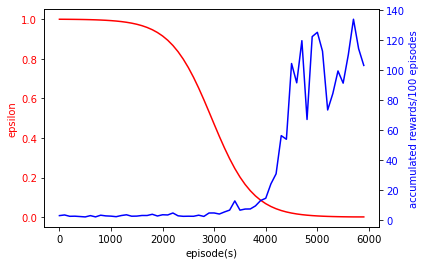

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 
        
ax1.set_xlabel('episode(s)') 
ax1.set_ylabel('epsilon', color = 'red') 
ax1.plot(t2, exploration_rate, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('accumulated rewards/100 episodes', color = 'blue') 
ax2.plot(t2, accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
plt.show()

START STATE: (0, 0, 1, 0)
(0, 0, 1, 0)
state: (0, 0, 1, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0

D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 1)
state: (0, 0, 0, 1)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action selected: 0
reward: 0.0
(0, 0, 0, 0)
state: (0, 0, 0, 0)
action

reward: 0.0
(0, 0, 0, 3)
state: (0, 0, 0, 3)
action selected: 2
reward: 0.0
(0, 0, 0, 4)
state: (0, 0, 0, 4)
action selected: 2
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 2
reward: 0.0
(0, 0, 0, 6)
state: (0, 0, 0, 6)
action selected: 0
reward: 0.0
(0, 0, 0, 6)
state: (0, 0, 0, 6)
action selected: 0
reward: 0.0
(0, 0, 0, 6)
state: (0, 0, 0, 6)
action selected: 0
reward: 0.0
(0, 0, 0, 6)
state: (0, 0, 0, 6)
action selected: 0
reward: 0.00019670573629834606
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0119300710188878
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.012542815484935974
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.012562252858540623
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.012562811001367927
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 7.171272958458782
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
rewar

action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
accumulated_rewards_per_episode: 7.62333824775686
START STATE: (0, 0, 0, 

action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 4)
state: (0, 0, 0, 4)
action selected: 2
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0,

action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0,

reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 7)
state: (0, 0, 0, 7)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 2
reward: 0.0
(0, 0, 0, 9)
state: (0, 0, 0, 9)
action selected: 3
reward: 0.0
(0, 0, 0, 8)
state: (0, 0, 0, 8)
action selected: 0
reward: 0.0
accumulated_rewards_per_epis

reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 1, 6)
state: (0, 0, 1, 6)
action selected: 3
reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 2, 5)
state: (0, 0, 2, 5)
action selected: 0
reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 2, 5)
state: (0, 0, 2, 5)
action selected: 0
reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 2, 5)
state: (0, 0, 2, 5)
action selected: 0
reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 2, 5)
state: (0, 0, 2, 5)
action selected: 0
reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 2, 5)
state: (0, 0, 2, 5)
action selected: 0
reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 2, 5)
state: (0, 0, 2, 5)
action selected: 0
reward: 0.0
(0, 0, 1, 5)
state: (0, 0, 1, 5)
action selected: 1
reward: 0.0
(0, 0, 2, 5)
state: (0, 0, 2

reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0, 5)
action selected: 0
reward: 0.0
(0, 0, 0, 5)
state: (0, 0, 0

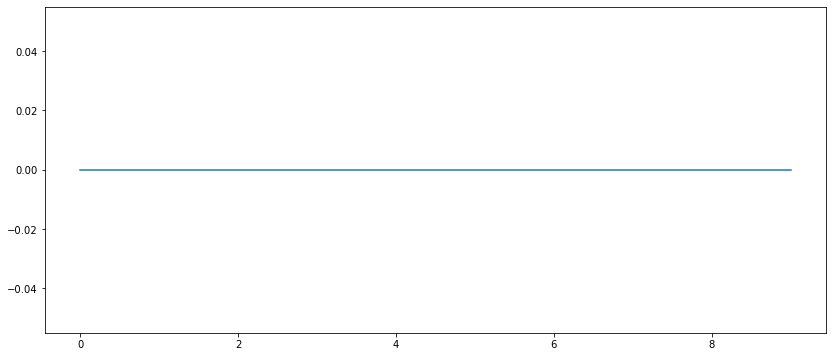

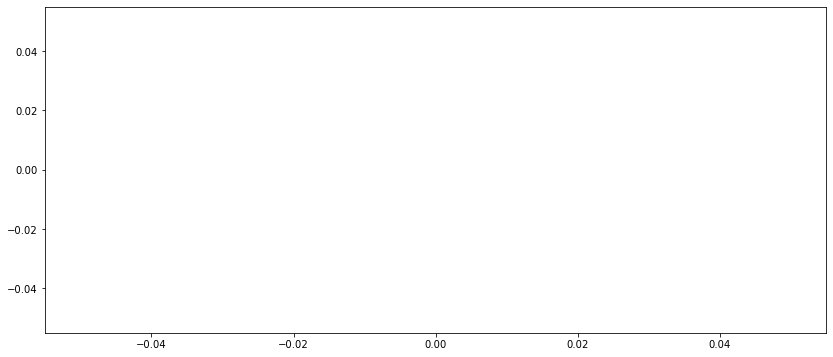

In [41]:
######### verify the dqn_cnn policy
'''
Parameters
----------
start : (r,c) = POMDP state
    The start state of the product POMDPs.

EPISODES : int
    The number of episodes.

num_steps : int 
    The episode length.

'''

from dqn_cnn import DQNAgent
EPISODES=10
num_steps=100

Path = []

gamma=0.99999
gammaB=0.9

# the defined belief_state size and action size
belief_state_size = np.shape(csrl.belief_state)
#action_size = np.shape(csrl.A)

# find the size of belief_state for np.reshape
prod_b_state_size = 1
for i in range(len(belief_state_size)):
    prod_b_state_size = prod_b_state_size * belief_state_size[i]
# find the size of action for np.reshape

# action size
#prod_action_size = csrl.shape[4]
prod_action_size = 4

agent = DQNAgent(prod_b_state_size, csrl.shape[2], csrl.shape[3], csrl.shape[1], prod_action_size, gamma, gammaB)
agent.load("./save/DQN_CNN_10_frontier.h5")
agent.epsilon = 0
done = False
num_episode_for_reward = 100 # print the accumulated reward per num of episode
# initialize the list for plot
accumulated_rewards=[]
exploration_rate=[]
accumulated_rewards_hundred_steps = []

for e in range(EPISODES):
    accumulated_rewards_per_episode=0
    done = False
    subpath = []

    pomdp_state = csrl.pomdp.random_state()
    while csrl.pomdp.label[pomdp_state[0],pomdp_state[1]] == ('c',) or csrl.pomdp.structure[(pomdp_state[0],pomdp_state[1])]=='B':
        #print('state in c and B, state is regenerated')
        pomdp_state = csrl.pomdp.random_state()
    #pomdp_state = (9, 7)

    state = (csrl.shape[0]-1,csrl.oa.q0)+(pomdp_state) # select the start product state
    print('START STATE: '+str(state))
    belief_state = csrl.belief_state # initialize the belief state
    
    csrl.track = [0,1] #self.initial_track # initialize frontier set = [0,1]
    ###print('begin new episode, self.track is reset')
    ###print('frontier reset as: [' + str(self.track)[1:-1] + ']')
    reshaped_reward = csrl.reshaped_reward_init
    ###print('begin new episode, reward is reset to initial reward')

    for step in range(num_steps):
        print(state)
        subpath.append(state)
        # reshape the belief state as the input to acquire the action
        input_b_state = np.reshape(belief_state,(1, csrl.shape[2], csrl.shape[3], csrl.shape[1]))
        print('state: '+str(state))
        #print('input_b_state: '+str(input_b_state))

        # verify the existence of action and select the action from the belief_state
        action_probs = agent.act_trained(input_b_state)
        action_probs = np.reshape(action_probs,(prod_action_size,1))
        #print('action_probs: '+str(action_probs))

        i = 0
        possible_actions = []
        for i in range(len(csrl.A[state])):
            possible_actions.append(action_probs[csrl.A[state][i]])
        action = csrl.A[state][np.argmax(possible_actions)]
        #print('possible_actions :'+str(possible_actions))
        print('action selected: '+str(action))

        ################## The agnet on POMDP simualtion

        # agent moves to the next state
        states, probs = csrl.transition_probs[state][action]
        next_state = states[np.random.choice(len(states),p=probs)]
        # find the observation states' list and the corresponding probabilities
        obsv_states, obsv_probs = csrl.pomdp.get_observation_prob(next_state[-2:])
        # observe the next state
        obsv_state = csrl.pomdp.generate_obsv_state(obsv_states, obsv_probs)

        ################## The belief_state update with the loops

        # temproraily store the current belief state
        current_belief_state = belief_state

        # multiply the transition probability matrix
        belief_state_after_transition = []
        for s in csrl.states():
            belief_state_after_transition.append(belief_state[s]*csrl.belief_transition_probs[s][action])
        belief_state_after_transition = sum(belief_state_after_transition)
        # update the belief state with the observation probability matrix
        updated_belief_state = belief_state_after_transition
        for s in csrl.states():
            updated_belief_state[s] = updated_belief_state[s]*csrl.belief_observation_probs[s][obsv_state[0], obsv_state[1]]
        belief_state = updated_belief_state/sum(sum(sum(sum(updated_belief_state))))

        ################# The training process
        
        # Update the frontier set + update reward setup accordingly
        reshaped_reward = csrl.Tf(state, next_state, reshaped_reward)
        ###print('frontier set: [' + str(csrl.track)[1:-1] + ']')
        
        # calculate the reward from the next belief state and find gamm
        reward = np.sum(np.reshape(belief_state,(1,prod_b_state_size))*reshaped_reward)

        state = next_state

        accumulated_rewards_per_episode = accumulated_rewards_per_episode + reward
        print('reward: '+str(reward))
    
    Path.append(subpath)
    
    print('accumulated_rewards_per_episode: '+str(accumulated_rewards_per_episode))
    accumulated_rewards.append(accumulated_rewards_per_episode)
    exploration_rate.append(agent.epsilon)

    if len(accumulated_rewards)>=num_episode_for_reward:
        accumulated_rewards_hundred_steps.append(np.average(accumulated_rewards))
        accumulated_rewards = []

import matplotlib.pyplot as plt
t1 = np.arange(0, EPISODES, 1)
t2 = np.arange(0, len(accumulated_rewards_hundred_steps)*num_episode_for_reward, num_episode_for_reward)

plt.figure(figsize=(14, 6))
display(plt.plot(t1, exploration_rate))

plt.figure(figsize=(14, 6))
display(plt.plot(t2, accumulated_rewards_hundred_steps))
#matplotlib.pyplot.scatter(len(accumulated_rewards_hundred_steps)*10, accumulated_rewards_hundred_steps, s=0.5)

In [47]:
print(Path[0])
print(Path[1])
print(Path[2])
print(Path[3])
print(Path[4])
print(Path[5])
print(Path[6])
print(Path[7])
print(Path[8])
print(Path[9])

[(0, 0, 1, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0

In [42]:
import pylab as pl
from matplotlib.collections import LineCollection

size_x = 10
size_y = 10

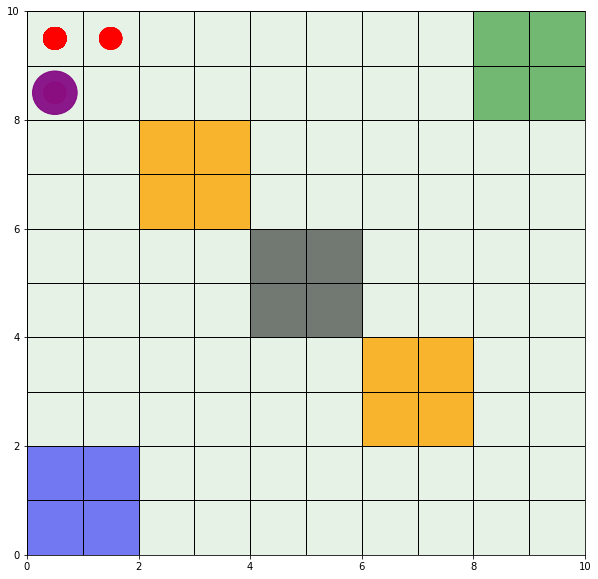

In [45]:
path = Path[0]

### plot the path on 'q0'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    
        
for i in range(len(path)):
    if path[i][1]<=0:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break

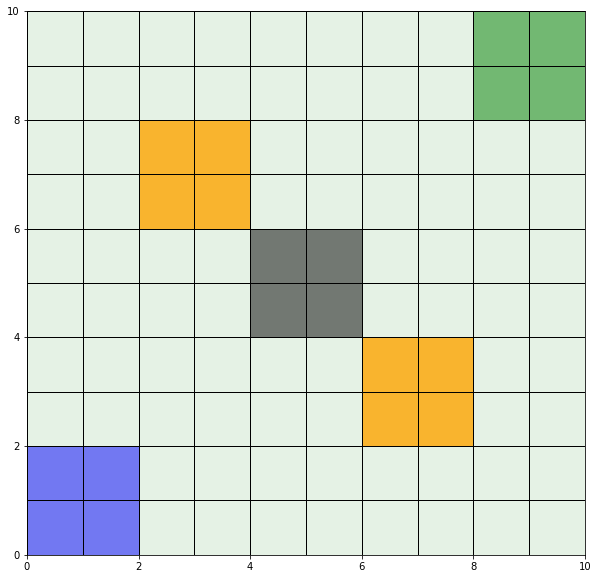

In [46]:
### plot the path on 'q1'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    

ii=i
for i in range(ii, len(path)):
    if path[i][1]==1:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break

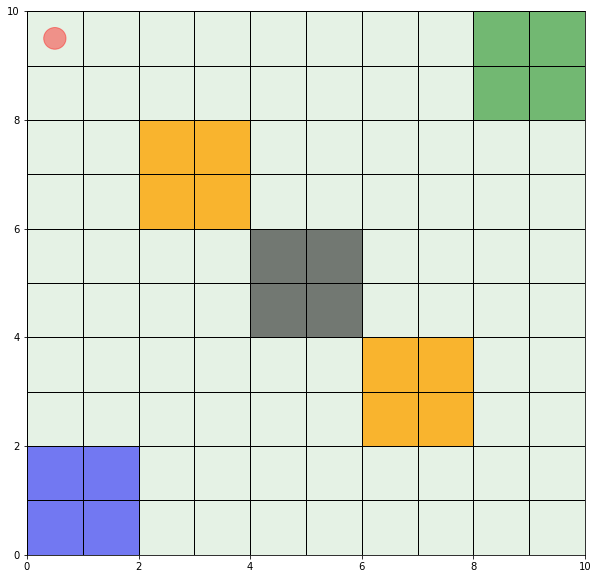

In [32]:
### plot again the path on 'q0'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    

ii=i
for i in range(ii, len(path)):
    if path[i][1]<=0:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break